# Physical Facilities vs. Obesity and Diabetes rates in areas with higher/lower fast food restaurants density

The question that will be answered is:

* Do areas with higher number of gyms and physical acttivity options have lower obesity rates even with high fast food restaurants density?

This analysis has the main goal to demonstrate if access to physical activity infraestructure can counteract the effects of fast food restautants.


In [1]:
#Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Some descriptive statistics

In [2]:
#Write the path adn import csvas dataframe
csv_path = Path("Resources/Data_cleaned.csv")
data_df =pd.read_csv(csv_path)
data_df.head()

,FIPS,State,County,DIABETES_08(%),DIABETES_13(%),OBESE_12(%),OBESE_17(%),PHYSICALLY_ACT_17(%),GYMS_11,GYMS_16,...,FULL_SERVICE_RESTAURANTS_11,FULL_SERVICE_RESTAURANTS_16,FULL_SERVICE_RESTAURANTS_11_16(%),FULL_SERVICE_RESTAURANTS_POP_11,FULL_SERVICE_RESTAURANTS_POP_16,FULL_SERVICE_RESTAURANTS_POP_11_16(%),EXPENDITURES_PPC_FAST_FOOD_07,EXPENDITURES_PPC_FAST_FOOD_12,EXPENDITURES_PPC_RESTAURANTS_07,EXPENDITURES_PPC_RESTAURANTS_12
0,2016,AK,Aleutians West,5.9,6.2,25.7,34.2,18.4,0,0,...,2,4,100.000000,0.357974,0.696015,94.431878,582.71551,511.480788,688.084194,724.808882
1,2020,AK,Anchorage,7.0,7.0,25.7,34.2,18.4,35,44,...,222,247,11.261261,0.749263,0.830598,10.855316,582.71551,511.480788,688.084194,724.808882
2,2060,AK,Bristol Bay,6.8,8.5,25.7,34.2,18.4,0,0,...,2,2,0.000000,1.941748,2.209945,13.812155,582.71551,511.480788,688.084194,724.808882
3,2068,AK,Denali,6.0,5.8,25.7,34.2,18.4,0,0,...,8,6,-25.000000,4.278075,2.933985,-31.418093,582.71551,511.480788,688.084194,724.808882
4,2070,AK,Dillingham,7.8,7.2,25.7,34.2,18.4,0,0,...,3,2,-33.333333,0.606306,0.401929,-33.708467,582.71551,511.480788,688.084194,724.808882


In [3]:
data_df.columns

Index(['FIPS', 'State', 'County', 'DIABETES_08(%)', 'DIABETES_13(%)',
       'OBESE_12(%)', 'OBESE_17(%)', 'PHYSICALLY_ACT_17(%)', 'GYMS_11',
       'GYMS_16', 'GYMS_11_16_(%)', 'GYMS_POP_11', 'GYMS_POP_16',
       'GYMS_POP_11_16(%)', 'WHITEPPL_10(%)', 'BLACKPPL_10(%)',
       'HISPPPL_10(%)', 'ASIANPPL_10(%)', 'AMERI_INDPPL_10(%)',
       'HAWAIIANPPL_10(%)', 'OVER65_PPL_10(%)', 'UNDER18_PPL_10(%)',
       'MEDIAN_HOUSEHOLD_INCOME_15', 'POVERTY_RATE_15(%)',
       'PERSISTENT_POVERTY_COUNTIES_10', 'CHILD_POVERTY_RATE_15(%)',
       'PERSISTENT_CHILD_POVERTY_COUNTIES_10', 'METROPOLITAN_COUNTIES_13',
       'POPULATION_LOSS_COUNTIES_10', 'FAST_FOOD_RESTAURANTS_11',
       'FAST_FOOD_RESTAURANTS_16', 'FAST_FOOD_RESTAURANTS_11_16(%)',
       'FAST_FOOD_RESTAURANT_POP_11', 'FAST_FOOD_RESTAURANT_POP_16',
       'PCH_FFRPTH_11_16', 'FULL_SERVICE_RESTAURANTS_11',
       'FULL_SERVICE_RESTAURANTS_16', 'FULL_SERVICE_RESTAURANTS_11_16(%)',
       'FULL_SERVICE_RESTAURANTS_POP_11', 'FULL_SERVICE

In [4]:
data_df.count()


FIPS                                     2213
State                                    2213
County                                   2213
DIABETES_08(%)                           2213
DIABETES_13(%)                           2213
OBESE_12(%)                              2213
OBESE_17(%)                              2213
PHYSICALLY_ACT_17(%)                     2213
GYMS_11                                  2213
GYMS_16                                  2213
GYMS_11_16_(%)                           2213
GYMS_POP_11                              2213
GYMS_POP_16                              2213
GYMS_POP_11_16(%)                        2213
WHITEPPL_10(%)                           2213
BLACKPPL_10(%)                           2213
HISPPPL_10(%)                            2213
ASIANPPL_10(%)                           2213
AMERI_INDPPL_10(%)                       2213
HAWAIIANPPL_10(%)                        2213
OVER65_PPL_10(%)                         2213
UNDER18_PPL_10(%)                 

### Diabetes and obesity rates

In [5]:
#Exploring diabetes 08 vs diabetes 13
mean_diab_08 = np.mean(data_df['DIABETES_08(%)'])
mean_diab_13 = np.mean(data_df['DIABETES_13(%)'])

median_diab_08 = np.median(data_df['DIABETES_08(%)'])
median_diab_13 = np.median(data_df['DIABETES_13(%)'])

sd_diab_08 = np.std(data_df['DIABETES_08(%)'])
sd_diab_13 = np.std(data_df['DIABETES_13(%)'])


statistics_diab = [{"Mean_diabetes_2008": mean_diab_08, "Median_diabetes_2008": median_diab_08, "Standard_dev_diab_08": sd_diab_08,
                    "Mean_diabetes_2013": mean_diab_13, "Median_diabetes_2013": median_diab_13, "Standard_dev_diab_13": sd_diab_13}]

statistics_diab_df = pd.DataFrame(statistics_diab)
statistics_diab_df

,Mean_diabetes_2008,Median_diabetes_2008,Standard_dev_diab_08,Mean_diabetes_2013,Median_diabetes_2013,Standard_dev_diab_13
0,9.709309,9.6,1.935096,10.972345,10.9,2.333788


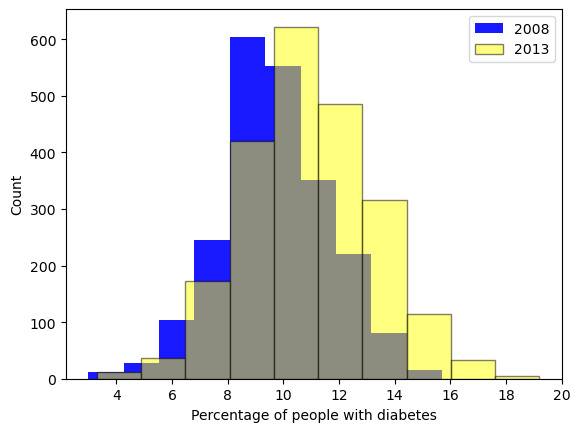

In [8]:
series1 = data_df['DIABETES_08(%)']  
series2 = data_df['DIABETES_13(%)']
plt.hist(series1, label = "2008", alpha=0.9, color="blue")
plt.hist(series2, label = "2013", alpha=0.5, color="yellow", edgecolor = "black")
plt.xlabel("Percentage of people with diabetes")
plt.ylabel("Count")
plt.legend()
plt.savefig("./Images/diabetes_distribution.png")
plt.show()

In [9]:
#Exploring obesity 12 vs obesity 17
mean_obesity_12 = np.mean(data_df['OBESE_12(%)'])
mean_obesity_17 = np.mean(data_df['OBESE_17(%)'])

median_obesity_12 = np.median(data_df['OBESE_12(%)'])
median_obesity_17 = np.median(data_df['OBESE_17(%)'])

sd_obesity_12 = np.std(data_df['OBESE_12(%)'])
sd_obesity_17 = np.std(data_df['OBESE_17(%)'])


statistics_obesity = [{"Mean_obesity_12": mean_obesity_12, "Median_obesity_12": median_obesity_12, "Standard_dev_ob_12": sd_obesity_12,
                    "Mean_obesity_17": mean_obesity_17, "Median_obesity_17": median_obesity_17, "Standard_dev_ob_17": sd_obesity_17}]

statistics_obesity_df = pd.DataFrame(statistics_obesity)
statistics_obesity_df



,Mean_obesity_12,Median_obesity_12,Standard_dev_ob_12,Mean_obesity_17,Median_obesity_17,Standard_dev_ob_17
0,28.883009,29.2,3.010904,31.670131,32.4,3.437261


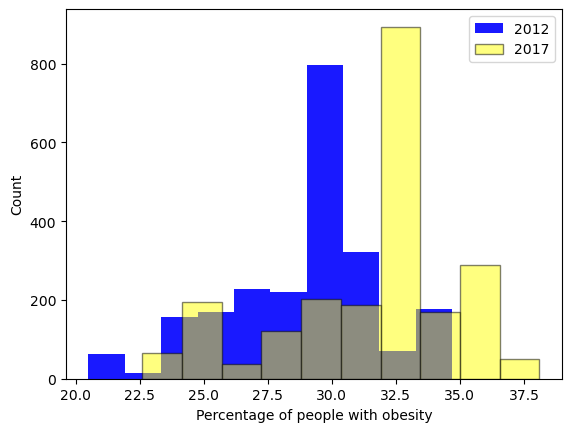

In [10]:
series1 = data_df['OBESE_12(%)']  
series2 = data_df['OBESE_17(%)']
plt.hist(series1, label = "2012", alpha=0.9, color="blue")
plt.hist(series2, label = "2017", alpha=0.5, color="yellow", edgecolor = "black")
plt.xlabel("Percentage of people with obesity")
plt.ylabel("Count")
plt.legend()
plt.savefig("./Images/obesity_distribution.png")
plt.show()

In [11]:
#Exploring obesity 12 vs obesity 17
mean_ffood_11 = np.mean(data_df['FAST_FOOD_RESTAURANTS_11'])
mean_ffood_16 = np.mean(data_df['OBESE_17(%)'])

median_obesity_12 = np.median(data_df['OBESE_12(%)'])
median_obesity_17 = np.median(data_df['OBESE_17(%)'])

sd_obesity_12 = np.std(data_df['OBESE_12(%)'])
sd_obesity_17 = np.std(data_df['OBESE_17(%)'])


statistics_obesity = [{"Mean_obesity_12": mean_obesity_12, "Median_obesity_12": median_obesity_12, "Standard_dev_ob_12": sd_obesity_12,
                    "Mean_obesity_17": mean_obesity_17, "Median_obesity_17": median_obesity_17, "Standard_dev_ob_17": sd_obesity_17}]

statistics_obesity_df = pd.DataFrame(statistics_obesity)
statistics_obesity_df

,Mean_obesity_12,Median_obesity_12,Standard_dev_ob_12,Mean_obesity_17,Median_obesity_17,Standard_dev_ob_17
0,28.883009,29.2,3.010904,31.670131,32.4,3.437261


### Number of physical activity facilities

In [12]:
#Exploring Gyms 11 vs Gyms 16
mean_gyms_11 = np.mean(data_df['GYMS_11'])
mean_gyms_16 = np.mean(data_df['GYMS_16'])

median_gyms_11 = np.median(data_df['GYMS_11'])
median_gyms_16 = np.median(data_df['GYMS_16'])

sd_gyms_11 = np.std(data_df['GYMS_11'])
sd_gyms_16 = np.std(data_df['GYMS_16'])


statistics_gyms = [{"Mean_gyms_2011": mean_gyms_11, "Median_gyms_2011": median_gyms_11, "Standard_dev_gyms_2011": sd_gyms_11,
                    "Mean_gyms_2016": mean_gyms_16, "Median_gyms_2016": median_gyms_16, "Standard_gyms_2016": sd_gyms_16}]

statistics_gyms_df = pd.DataFrame(statistics_gyms)
statistics_gyms_df

,Mean_gyms_2011,Median_gyms_2011,Standard_dev_gyms_2011,Mean_gyms_2016,Median_gyms_2016,Standard_gyms_2016
0,10.507456,2.0,32.857943,12.177587,2.0,41.420262


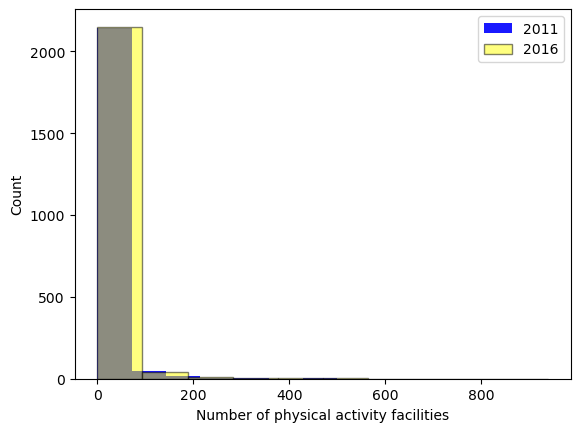

In [13]:
series1 = data_df['GYMS_11']  
series2 = data_df['GYMS_16']
plt.hist(series1, label = "2011", alpha=0.9, color="blue")
plt.hist(series2, label = "2016", alpha=0.5, color="yellow", edgecolor = "black")
plt.xlabel("Number of physical activity facilities")
plt.ylabel("Count")
plt.legend()
plt.savefig("./Images/gyms_distribution.png")
plt.show()

### Density of fast food restaurants

In [14]:
#Exploring fast food restaurants 11 vs fast food restaurants 16
mean_ffr_11 = np.mean(data_df['FAST_FOOD_RESTAURANTS_11'])
mean_ffr_16 = np.mean(data_df['FAST_FOOD_RESTAURANTS_16'])

median_ffr_11 = np.median(data_df['FAST_FOOD_RESTAURANTS_11'])
median_ffr_16 = np.median(data_df['FAST_FOOD_RESTAURANTS_16'])

sd_ffr_11 = np.std(data_df['FAST_FOOD_RESTAURANTS_11'])
sd_ffr_16 = np.std(data_df['FAST_FOOD_RESTAURANTS_16'])


statistics_ffr = [{"Mean_ffr_2011": mean_ffr_11, "Median_ffr_2011": median_ffr_11, "Standard_dev_ffr_2011": sd_ffr_11,
                    "Mean_ffr_2016": mean_ffr_16, "Median_ffr_2016": median_ffr_16, "Standard_ffr_2016": sd_ffr_16}]

statistics_ffr_df = pd.DataFrame(statistics_ffr)
statistics_ffr_df

,Mean_ffr_2011,Median_ffr_2011,Standard_dev_ffr_2011,Mean_ffr_2016,Median_ffr_2016,Standard_ffr_2016
0,77.517397,16.0,270.33669,85.691821,16.0,307.948138


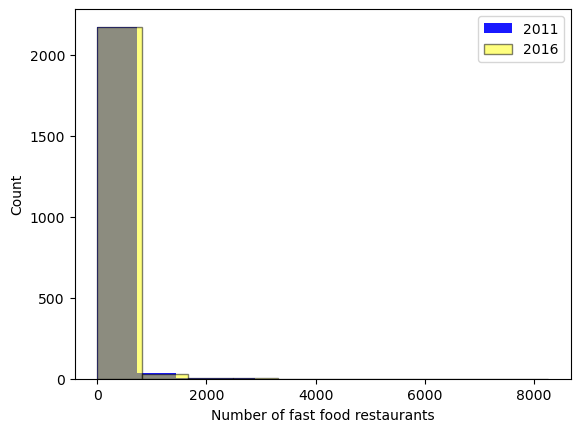

In [15]:
series1 = data_df['FAST_FOOD_RESTAURANTS_11']  
series2 = data_df['FAST_FOOD_RESTAURANTS_16']
plt.hist(series1, label = "2011", alpha=0.9, color="blue")
plt.hist(series2, label = "2016", alpha=0.5, color="yellow", edgecolor = "black")
plt.xlabel("Number of fast food restaurants")
plt.ylabel("Count")
plt.legend()
plt.savefig("./Images/ffrestaurants_distribution.png")
plt.show()

## Analysis of relationship between number of fast food restaurants and obesity/diabetes rates

In order to analyse the question: Do areas with higher number of gyms and physical acttivity options have lower obesity rates even with high fast food restaurants density?, it is necessary to know if there is a relationship between number of fast food restaurants and obesity/diabetes rates.

For this , we will perform a two sample t-test to identify:
* Ha: "Higher number of fast food restaurants in a county produces an impact on the rates of obesity/diabetes"
* H0: "Higher number of fast food restaurants in a county has no impact on rates of obesity/diabetes"


In [16]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress 

### Fast food restaurants and obesity rates

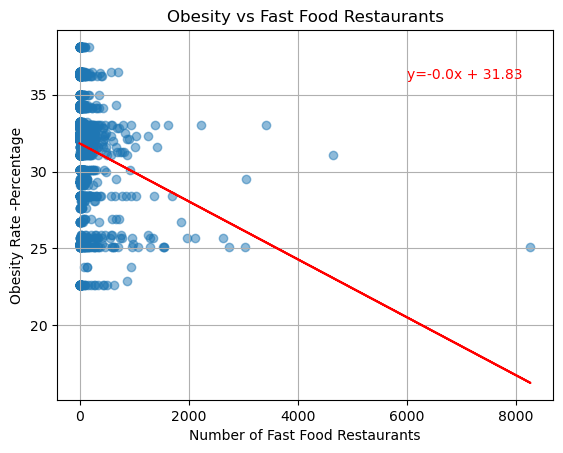

In [17]:
#Scatter plot of relationship between number of fast food restaurants and obesity rates
(slope, intercept, rvalue, pvalue, stderr) = linregress(data_df["FAST_FOOD_RESTAURANTS_16"], data_df["OBESE_17(%)"])
regress = slope * data_df["FAST_FOOD_RESTAURANTS_16"] + intercept
line_eq = f'y={round(slope,2)}x + {round(intercept, 2)}'

plt.scatter(data_df["FAST_FOOD_RESTAURANTS_16"], data_df["OBESE_17(%)"], alpha=0.5)
plt.xlabel("Number of Fast Food Restaurants")
plt.ylabel("Obesity Rate -Percentage")
plt.title("Obesity vs Fast Food Restaurants")
plt.plot(data_df["FAST_FOOD_RESTAURANTS_16"], regress, color="red")
plt.grid(True)
plt.annotate(line_eq, (6000,36), fontsize=10, color = "red")
plt.savefig("./Images/ffr_obesity-regression.png")
plt.show()

In [18]:
print(f'The rsquare value is: {rvalue**2}')

The rsquare value is: 0.028509641977812795


The results of the linear regression would confirm the null hypothesis, because the equation shows that the x coefficient is 0, so it means that there is __no relationship__ between the variables. In order to compare groups, we will perform the t-test:

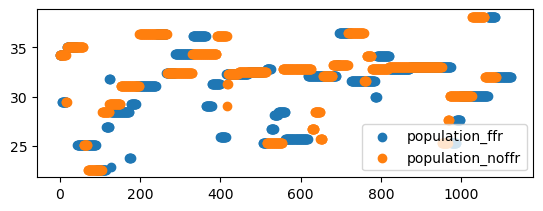

In [19]:
#Scatter plot of two populations
population_ffr = data_df[data_df["FAST_FOOD_RESTAURANTS_16"] >= 16]['OBESE_17(%)']
population_noffr = data_df[data_df["FAST_FOOD_RESTAURANTS_16"] < 16]['OBESE_17(%)']

plt.subplot(2, 1, 1)
plt.scatter(range(len(population_ffr)), population_ffr, label="population_ffr")
plt.scatter(range(len(population_noffr)), population_noffr, label="population_noffr")
plt.savefig("./Images/ffr_obesity-scatter.png")
plt.legend()


In [20]:
data_df = data_df.rename(columns = {"OBESE_17(%)": "obesity_17",
                                    "DIABETES_13(%)": "diabetes_13"
    
})

In [21]:
# Calculate the population mean for obesity rates in higher fast food restaurants density counties
population_ffr = data_df[data_df["FAST_FOOD_RESTAURANTS_16"] >= 16]
population_ffr.obesity_17.mean()

31.155288888888887

In [22]:
population_noffr = data_df[data_df["FAST_FOOD_RESTAURANTS_16"] < 16]
population_noffr.obesity_17.mean()

32.20248161764706

In [23]:
# Calculate t-test
stats.ttest_ind(population_ffr.obesity_17,population_noffr.obesity_17, equal_var=False)

TtestResult(statistic=-7.247751678945482, pvalue=5.829321572109927e-13, df=2210.0046770286135)

### Interpretation of results: 
The pvalue of the t-test is <0.01, which means that we can reject the null hypothesis that stated "There is no difference on the obesity rates of the counties with more than 16 (median) fast food restaurants in contrast to counties with less than 16 fast food restaurants".
 In that sense, the alternative hypothesis is accepted: "There is statistical difference on the obesity rates of the counties with more than 16 (median) fast food restaurants in contrast to counties with less than 16 fast food restaurants".

Howeever, in contrast of what we thought, the relationship is negative (t-statistic=-7.24), so that means that the counties with less than 16 fast food restaurants have higher obesity rates. 

This could be explained by two possible socioeconomic factors: 
1. The areas with more fast food restaurants have higher develompent and the population that live in those areas have higher acquisition power to access to more expensive and healthier restaurants.
2. The areas with more fast food restaurants have more access to physical activity facilities or public health programs that improve health in citizens.  


### Fast food restaurants and diabetes rates

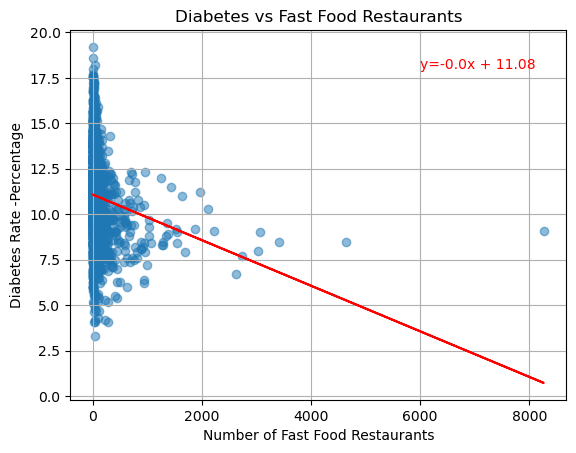

In [24]:
#Scatter plot of relationship between number of fast food restaurants and obesity rates
(slope, intercept, rvalue, pvalue, stderr) = linregress(data_df["FAST_FOOD_RESTAURANTS_16"], data_df["diabetes_13"])
regress = slope * data_df["FAST_FOOD_RESTAURANTS_16"] + intercept
line_eq = f'y={round(slope,2)}x + {round(intercept, 2)}'

plt.scatter(data_df["FAST_FOOD_RESTAURANTS_16"], data_df["diabetes_13"], alpha=0.5)
plt.xlabel("Number of Fast Food Restaurants")
plt.ylabel("Diabetes Rate -Percentage")
plt.title("Diabetes vs Fast Food Restaurants")
plt.plot(data_df["FAST_FOOD_RESTAURANTS_16"], regress, color="red")
plt.grid(True)
plt.annotate(line_eq, (6000,18), fontsize=10, color = "red")
plt.savefig("./Images/ffr_diabetes-regression.png")
plt.show()

In [25]:
print(f'The rsquare value is: {rvalue**2}')

The rsquare value is: 0.02732793347330301


Just as the linear regression of obesity rates vs. fast food restaurants, the results of the linear regression would confirm the null hypothesis, because the equation shows that the x coefficient is 0, so it means that there is __no relationship__ between the variables. In order to compare groups, we will perform the t-test:

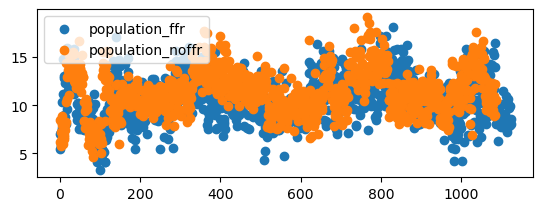

In [26]:
#Scatter plot of two populations
population_ffr = data_df[data_df["FAST_FOOD_RESTAURANTS_16"] >= 16]['diabetes_13']
population_noffr = data_df[data_df["FAST_FOOD_RESTAURANTS_16"] < 16]['diabetes_13']

plt.subplot(2, 1, 1)
plt.scatter(range(len(population_ffr)), population_ffr, label="population_ffr")
plt.scatter(range(len(population_noffr)), population_noffr, label="population_noffr")
plt.savefig("./Images/ffr_diabetes-scatter.png")
plt.legend()


In [27]:
# Calculate the population mean for obesity rates in higher fast food restaurants density counties
population_ffr = data_df[data_df["FAST_FOOD_RESTAURANTS_16"] >= 16]
population_ffr.diabetes_13.mean()

10.584888888888889

In [28]:
population_noffr = data_df[data_df["FAST_FOOD_RESTAURANTS_16"] < 16]
population_noffr.diabetes_13.mean()

11.37297794117647

In [29]:
# Calculate t-test
stats.ttest_ind(population_ffr.diabetes_13,population_noffr.diabetes_13, equal_var=False)

TtestResult(statistic=-8.054787186998766, pvalue=1.2886218552001376e-15, df=2209.563290089795)

### Interpretation of results: 
The results are not susprising, because they show the same trend as the one observed with obesity rates. 

The pvalue of the t-test is <0.01, which means that we can reject the null, hypothesis that stated "There is no difference on the diabetes rates of the counties with more than 16 (median) fast food restaurants in contrast to counties with less than 16 fast food restaurants".

In that sense, the alternative hypothesis is accepted: "There is statistical difference on the diabetes rates of the counties with more than 16 (median) fast food restaurants in contrast to counties with less than 16 fast food restaurants".

Howeever, in contrast of what we thought, the relationship is negative (t-statistic=-8.05), so that means that the restaurants with less than 16 fast food restaurants have higher diabetes rates.

This could be explained by two possible socioeconomic factors: 
1. The areas with more fast food restaurants have higher develompent and the population that live in those areas have higher acquisition power to access to more expensive and healthier restaurants.
2. The areas with more fast food restaurants have more access to physical activity facilities or public health programs that improve health in citizens.

To prove that he socioeconomic factors are more powerful over obesity and diabetes rates, we would try to test wheter having a high number of physical activity facilities has a positive effect over the obesity and diabetes rates (lower rates).

## Socioeconomic factor: Number of physical activity facilities vs. obesity rates in two groups

In this first analysis, the alternative hypothesis is: "Having a high number of physical activity facilities has a positive effect over the obesity rates (lower rates) in counties with high density of fast food restaurants"


The H0 is: "There is no difference on obesity rates of the counties with more than 12 (mean) physical activity facilities in contrast to counties with less than 12 physical activity facilities".

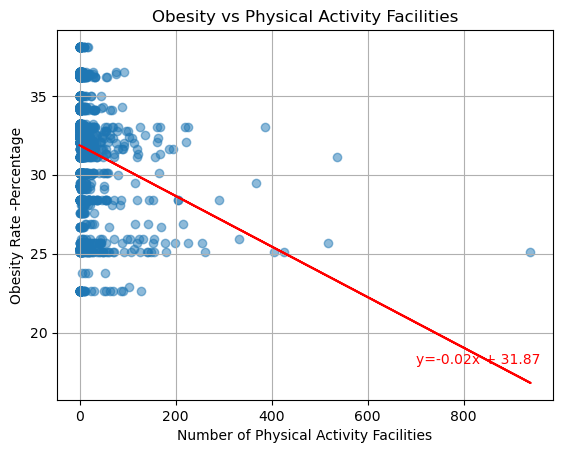

In [30]:
#Scatter plot of relationship between number of gyms and obesity rates
(slope, intercept, rvalue, pvalue, stderr) = linregress(data_df["GYMS_16"], data_df["obesity_17"])
regress = slope * data_df["GYMS_16"] + intercept
line_eq = f'y={round(slope,2)}x + {round(intercept, 2)}'

plt.scatter(data_df["GYMS_16"], data_df["obesity_17"], alpha=0.5)
plt.xlabel("Number of Physical Activity Facilities")
plt.ylabel("Obesity Rate -Percentage")
plt.title("Obesity vs Physical Activity Facilities")
plt.plot(data_df["GYMS_16"], regress, color="red")
plt.grid(True)
plt.annotate(line_eq, (700,18), fontsize=10, color = "red")
plt.savefig("./Images/gyms_obesity-regression.png")
plt.show()

In [31]:
print(f'The rsquare value is: {rvalue**2}')

The rsquare value is: 0.03735319062370986


The linear regression of obesity rates vs. number of gyms shows that the x coefficient is 0, so it means that there is __no relationship__ between the variables. The r square value is 0.04, so that means he number of gyms has a lower value of explicability. In order to compare groups, we will perform the t-test:

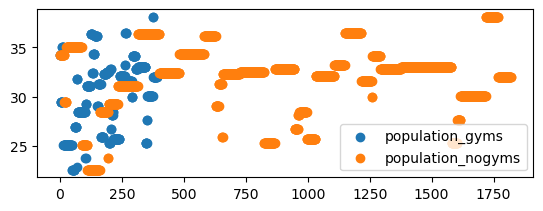

In [32]:
#Scatter plot of two populations
population_gyms = data_df[data_df["GYMS_16"] >= 12]['obesity_17']
population_nogyms = data_df[data_df["GYMS_16"] < 12]['obesity_17']

plt.subplot(2, 1, 1)
plt.scatter(range(len(population_gyms)), population_gyms, label="population_gyms")
plt.scatter(range(len(population_nogyms)), population_nogyms, label="population_nogyms")
plt.savefig("./Images/gyms_obesity-scatter.png")
plt.legend()

In [33]:
# Calculate the population mean for obesity rates in higher fast food restaurants density counties
population_gyms = data_df[data_df["GYMS_16"] >= 12]
population_gyms.obesity_17.mean()

30.056887755102043

In [34]:
population_nogyms = data_df[data_df["GYMS_16"] < 12]
population_nogyms.obesity_17.mean()

32.01740801757276

In [35]:
# Calculate t-test
stats.ttest_ind(population_gyms.obesity_17,population_nogyms.obesity_17, equal_var=False)

TtestResult(statistic=-10.050171352696069, pvalue=6.333292109738437e-22, df=548.0751988267542)

### Interpretation of results:

The pvalue of the t-test is <0.01, which means that we can reject the null hypothesis that stated "There is no difference on the obesity rates of the counties with more than 12 (mean) physical activity facilities in contrast to counties with less than 16 physical activity facilities".
In that sense, the alternative hypothesis is accepted: "There is statistical difference on the obesity rates of the counties with more than 12 (mean)  physical activity facilities in contrast to counties with less than 12 physical activity facilities".

The relationship is negative (t-statistic=-10.05), so that means that the counties with less than 12 physical activity facilities have higher obesity rates. In contrast with the hypothesis test abot fast food restaurants and obesity rates, these results could confirm that socioeconomic factors of the counties have a stronger effect over health variables, such as obesity rates. 


## Socioeconomic factor: Number of physical activity facilities vs. diabetes rates in two groups

In this first analysis, the alternative hypothesis is: "Having a high number of physical activity facilities has a positive effect over the diabetes rates (lower rates) in counties with high density of fast food restaurants"


The H0 is: "There is no difference on diabetes rates of the counties with more than 12 (mean) physical activity facilities in contrast to counties with less than 12 physical activity facilities".

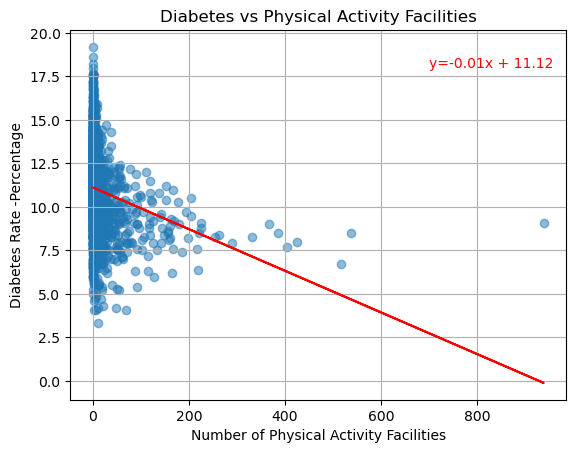

In [36]:
#Scatter plot of relationship between number of gyms and diabetes rates
(slope, intercept, rvalue, pvalue, stderr) = linregress(data_df["GYMS_16"], data_df["diabetes_13"])
regress = slope * data_df["GYMS_16"] + intercept
line_eq = f'y={round(slope,2)}x + {round(intercept, 2)}'

plt.scatter(data_df["GYMS_16"], data_df["diabetes_13"], alpha=0.5)
plt.xlabel("Number of Physical Activity Facilities")
plt.ylabel("Diabetes Rate -Percentage")
plt.title("Diabetes vs Physical Activity Facilities")
plt.plot(data_df["GYMS_16"], regress, color="red")
plt.grid(True)
plt.annotate(line_eq, (700,18), fontsize=10, color = "red")
plt.savefig("./Images/gyms_diabetes-regression.png")
plt.show()

In [37]:
print(f'The rsquare value is: {rvalue**2}')

The rsquare value is: 0.045096851040611466


The linear regression of diabetes rates vs. number of gyms shows that the x coefficient is 0.01, so it means that there is almost __no relationship__ between the variables. The r square value is 0.04, so that means he number of gyms has a lower value of explicability. In order to compare groups, we will perform the t-test:

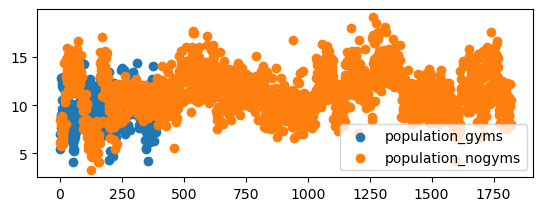

In [38]:
#Scatter plot of two populations
population_gyms = data_df[data_df["GYMS_16"] >= 12]['diabetes_13']
population_nogyms = data_df[data_df["GYMS_16"] < 12]['diabetes_13']

plt.subplot(2, 1, 1)
plt.scatter(range(len(population_gyms)), population_gyms, label="population_gyms")
plt.scatter(range(len(population_nogyms)), population_nogyms, label="population_nogyms")
plt.savefig("./Images/gyms_diabetes-scatter.png")
plt.legend()

In [39]:
# Calculate the population mean for obesity rates in higher fast food restaurants density counties
population_gyms = data_df[data_df["GYMS_16"] >= 12]
population_gyms.diabetes_13.mean()

9.481122448979592

In [40]:
population_nogyms = data_df[data_df["GYMS_16"] < 12]
population_nogyms.diabetes_13.mean()

11.293355299286105

In [41]:
# Calculate t-test
stats.ttest_ind(population_gyms.diabetes_13,population_nogyms.diabetes_13, equal_var=False)

TtestResult(statistic=-16.54198622180341, pvalue=9.801915611846224e-52, df=664.8127961154598)

### Interpretation of results

The pvalue of the t-test is <0.01, which means that we can reject the null hypothesis that stated "There is no difference on the diabetes rates of the counties with more than 12 (mean) physical activity facilities in contrast to counties with less than 16 physical activity facilities".

In that sense, the alternative hypothesis is accepted: "There is statistical difference on diabetes rates of the counties with more than 12 (mean)  physical activity facilities in contrast to counties with less than 12 physical activity facilities".

The relationship is negative (t-statistic=-10.05), so that means that the counties with less than 12 physical activity facilities have higher obesity rates. In contrast with the hypothesis test abot fast food restaurants and diabetes rates, these results could confirm that socioeconomic factors of the counties have a stronger effect over health variables, such as diabetes rates. 
